In [8]:
#importing required library
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [9]:
m=pd.read_csv('/content/drive/MyDrive/movies.csv')
r=pd.read_csv('/content/drive/MyDrive/ratings.csv')

In [ ]:
m.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [ ]:
r.head(5)

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [ ]:
m.describe()

,movieId
count,62423.000000
mean,122220.387646
std,63264.744844
min,1.000000
25%,82146.500000
50%,138022.000000
75%,173222.000000
max,209171.000000


In [ ]:
r.describe()

,userId,movieId,rating,timestamp
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,3.575093e+03,2.119202e+04,3.535808e+00,1.209524e+09
std,2.016420e+03,3.911993e+04,1.056276e+00,2.300684e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,1.843000e+03,1.148000e+03,3.000000e+00,9.999707e+08
50%,3.609000e+03,2.858000e+03,3.500000e+00,1.183782e+09
75%,5.322000e+03,8.464000e+03,4.000000e+00,1.446632e+09
max,7.045000e+03,2.091630e+05,5.000000e+00,1.574288e+09


In [ ]:
m.info()
r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userId     1048575 non-null  int64  
 1   movieId    1048575 non-null  int64  
 2   rating     1048575 non-null  float64
 3   timestamp  1048575 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 32.0 MB


In [ ]:
m.shape

(62423, 3)

In [ ]:
r.shape

(1048575, 4)

In [ ]:
m['genres'].value_counts()

Drama                                   9056
Comedy                                  5674
(no genres listed)                      5062
Documentary                             4731
Comedy|Drama                            2386
                                        ... 
Action|Adventure|Crime|Fantasy             1
Drama|Film-Noir|Musical|Thriller           1
Action|Drama|Horror|Mystery                1
Adventure|Comedy|Sci-Fi|Thriller|War       1
Comedy|Horror|Mystery|Sci-Fi|Western       1
Name: genres, Length: 1639, dtype: int64

In [ ]:
r['userId'].value_counts()

2177    4227
548     3212
1748    3193
847     2920
2982    2803
        ... 
4877      20
4879      20
4880      20
2118      20
1715      20
Name: userId, Length: 7045, dtype: int64

In [ ]:
m = m.drop_duplicates()
m = m.dropna()


In [ ]:
r = r.drop_duplicates()
r = r.dropna()

In [ ]:
# Check for missing values in each column
missing_values = m.isnull().sum()
print(missing_values)

movieId    0
title      0
genres     0
dtype: int64


In [ ]:
m['movieId'].fillna(m['movieId'].mean(), inplace=True)

In [10]:
m.duplicated().sum()

0

In [11]:
m.drop_duplicates(inplace=True)

In [12]:
m

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [13]:
r

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
1048570,7045,4447,3.5,1164258032
1048571,7045,4720,4.0,1164257756
1048572,7045,4857,4.0,1164242753
1048573,7045,4886,5.0,1168033506


In [ ]:
import seaborn as sns

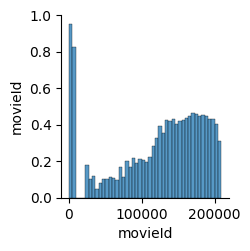

In [ ]:
sns.pairplot(m)

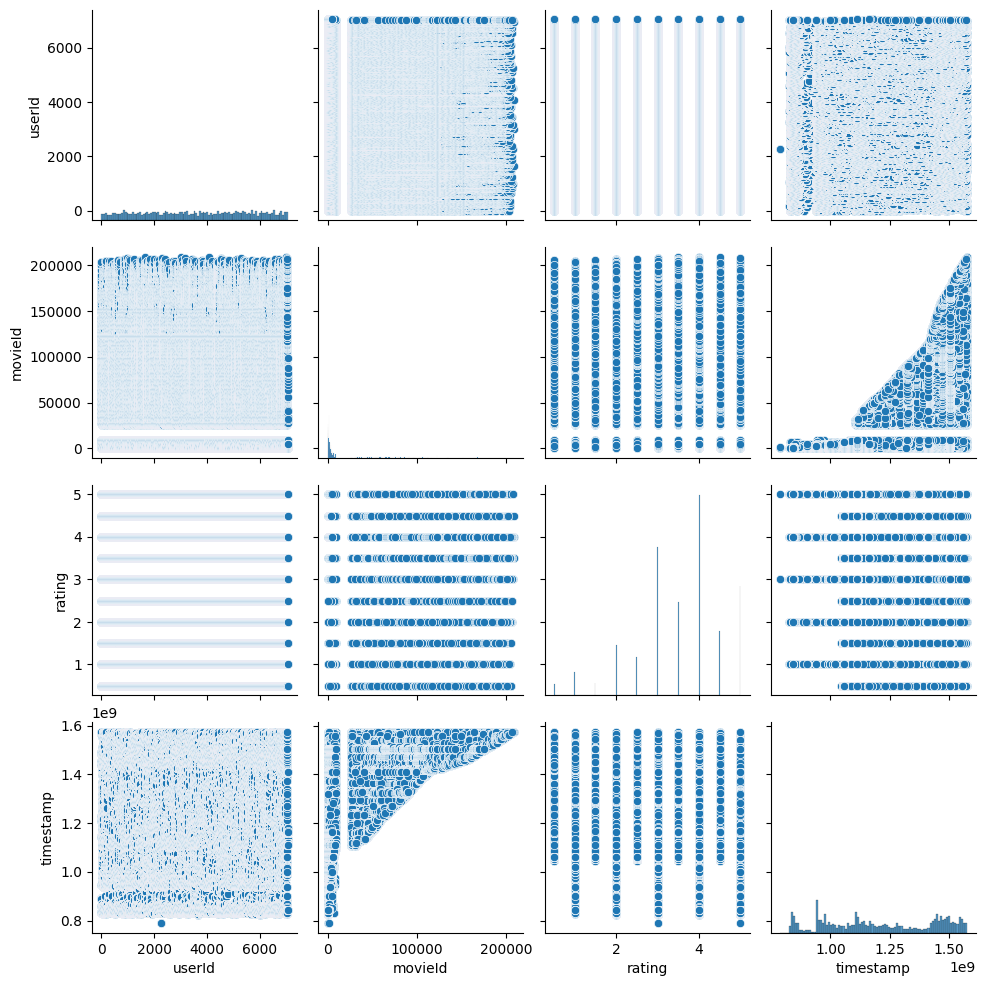

In [ ]:
sns.pairplot(r)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
X = m.drop(columns=['movieId'])
Y = m['movieId']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.40)

In [ ]:
x=r.drop(columns=['movieId',],axis=1)
r

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
1048570,7045,4447,3.5,1164258032
1048571,7045,4720,4.0,1164257756
1048572,7045,4857,4.0,1164242753
1048573,7045,4886,5.0,1168033506


In [ ]:
y=r['movieId']

In [ ]:
x_train.head()

,title,genres
56254,Double Agent (2003),Action|Thriller
32917,City Under Seige (1974),Crime|Thriller
24347,The Shortcut (2009),Horror|Mystery|Thriller
36793,Tarzan and the Leopard Woman (1946),Action|Adventure|Romance
28175,Saving Santa (2013),Animation|Children|Comedy


In [ ]:
x_test.head()

,title,genres
27039,Scooby-Doo in Arabian Nights (1994),Animation|Children
19730,"Little Thief, The (La petite voleuse) (1988)",Crime|Drama|Romance
40126,How Beer Saved the World (2011),Documentary
888,"Apartment, The (1960)",Comedy|Drama|Romance
21991,Father and Guns (De père en flic) (2009),Comedy|Crime


In [ ]:
y_test.head()

27039    128165
19730    102429
40126    158729
888         909
21991    113041
Name: movieId, dtype: int64

In [ ]:
y_train.head()

56254    193767
32917    142004
24347    121269
36793    151163
28175    131098
Name: movieId, dtype: int64

In [ ]:
X_train = m.drop(labels='movieId', axis=1)

In [ ]:
y_train=m.movieId

In [ ]:
print(X_train.head(),"\n", y_train.head())

                                title  \
0                    Toy Story (1995)   
1                      Jumanji (1995)   
2             Grumpier Old Men (1995)   
3            Waiting to Exhale (1995)   
4  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy   
 0    1
1    2
2    3
3    4
4    5
Name: movieId, dtype: int64


In [ ]:
X_train = r.drop(labels='movieId', axis=1)

In [ ]:
y_train=r.movieId

In [ ]:
print(X_train.head(),"\n", y_train.head())

   userId  rating   timestamp
0       1     5.0  1147880044
1       1     3.5  1147868817
2       1     5.0  1147868828
3       1     5.0  1147878820
4       1     3.5  1147868510 
 0    296
1    306
2    307
3    665
4    899
Name: movieId, dtype: int64


In [ ]:
X_test = m.drop(labels='movieId', axis=1)

In [ ]:
y_test = m.movieId

In [ ]:
X_train.shape,X_test.shape

((62423, 2), (62423, 2))

In [ ]:
y_train.shape,y_test.shape

((62423,), (62423,))

In [ ]:
X_test = r.drop(labels='movieId', axis=1)

In [ ]:
y_test = r.movieId

In [ ]:
X_train.shape,X_test.shape

((1048575, 3), (1048575, 3))

In [ ]:
y_train.shape,y_test.shape

((1048575,), (1048575,))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k=3
model = KNeighborsClassifier(n_neighbors = k)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [1]:
import sklearn

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import sklearn.preprocessing

In [5]:
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [ ]:
user_items_matrix =pd.pivot_table(r,index=r,columns='movieId',values='ratings',fill_value=0)

In [34]:
actual_ratings =[0,3,2,0,1]

In [23]:
recommended_movies = r

In [24]:
predicted_ratings =[m.loc[m['title'] ==title,'movieId'].mean() for title in recommended_movies]

In [31]:
mae=mean_absolute_error(actual_ratings,predicted_ratings)
print(f'mean_absolute_error:{mae}')

ValueError: ignored

In [ ]:
rmse = mean_squared_error(actual_ratings,predicted_ratings,squared=False)
print(f'mean_squared_error:{rmse}')